In [110]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

import warnings 

warnings.filterwarnings("ignore")

df = pd.read_csv("./repro-out/pred_nonoisy.csv")
out0 = pd.read_csv("./initial-out/pred_nonoisy_initial.csv")
data = df


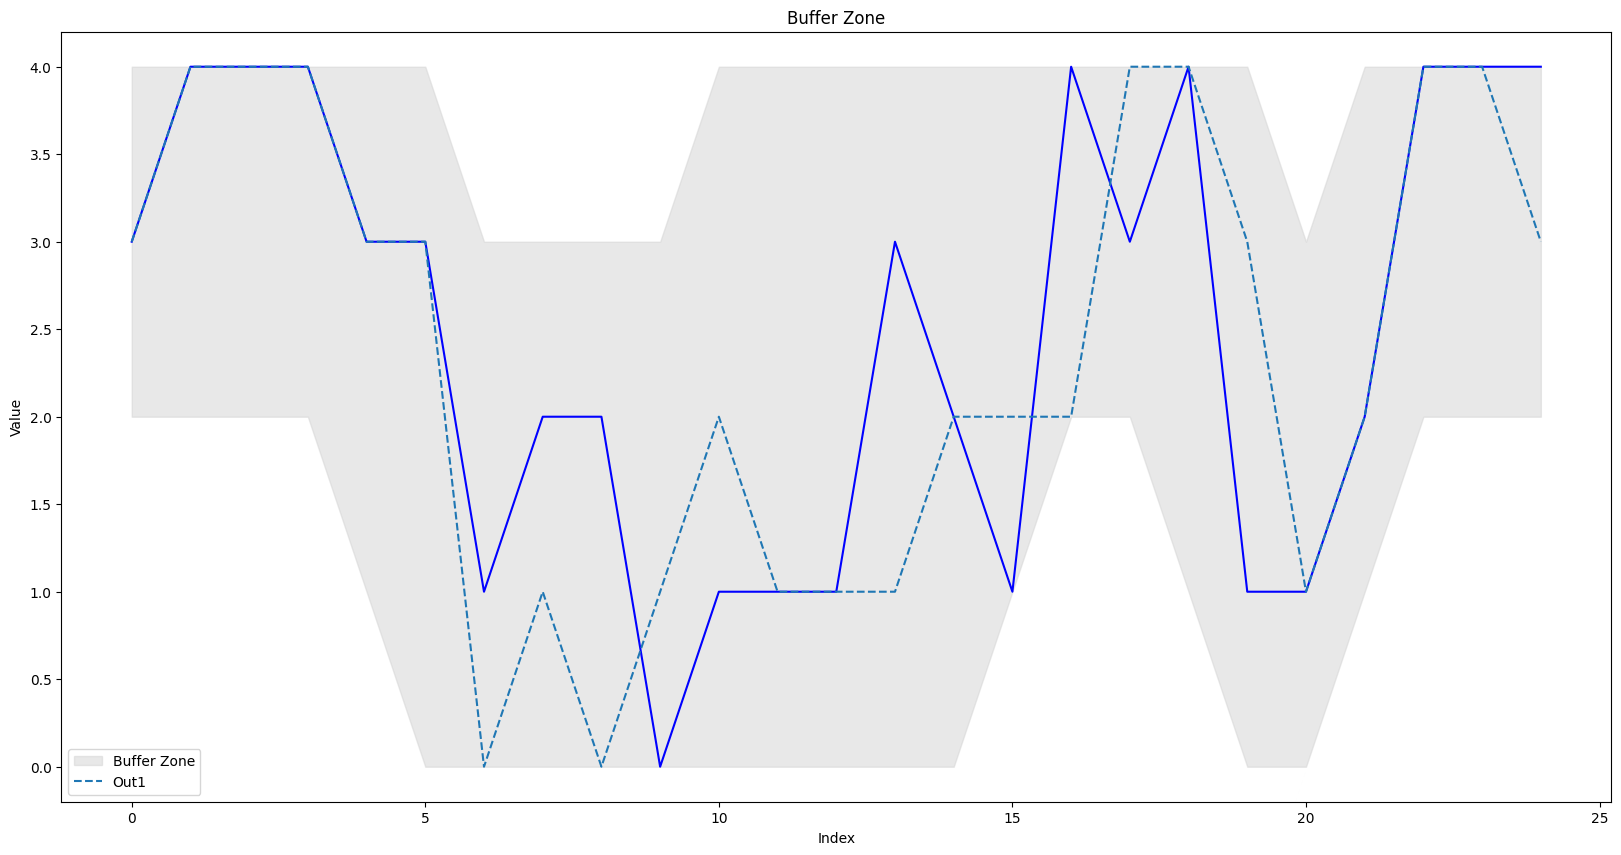

25 25
100.0


In [111]:
def calculate_proportion(values, lower_bound, upper_bound):
    # 确保所有输入都是 NumPy 数组
    if isinstance(values, pd.Series):
        values = values.to_numpy().flatten()
    if isinstance(lower_bound, pd.Series):
        lower_bound = lower_bound.to_numpy().flatten()
    if isinstance(upper_bound, pd.Series):
        upper_bound = upper_bound.to_numpy().flatten()
    
    common_count = 0
    total_count = len(values)
    
    for value, lb, ub in zip(values, lower_bound, upper_bound):
        # print(value, lb, ub)
        if lb <= value <= ub:
            common_count += 1
    print(common_count, total_count)
    return common_count / total_count*100

# 初始化缓冲区上下界的数组
buffer_upper = []
buffer_lower = []

# 获取列的范围
start_col = data.columns.get_loc("Out1")
end_col = data.columns.get_loc("Out1000") + 1

# 对每一行进行正态性检验并计算缓冲区
for i in range(data.shape[0]):
    row_data = data.iloc[i, start_col:end_col]    
    buffer_upper.append(max(row_data))
    buffer_lower.append(min(row_data))

# 将缓冲区上下界转换为数组
buffer_upper = np.array(buffer_upper)
buffer_lower = np.array(buffer_lower)

# 生成x轴
x = np.arange(data.shape[0])

# 绘制缓冲区范围
plt.figure(figsize=(20, 10))
# 绘制Out0数据
plt.plot(x,out0, color='blue')

plt.fill_between(x, buffer_lower, buffer_upper, color='lightgray', alpha=0.5, label='Buffer Zone')

# 绘制部分数据列以示例
for i in range(1):
    plt.plot(x, data[f"Out{i+1}"], label=f'Out{i+1}', linestyle='--')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Buffer Zone')
plt.show()
# 计算Out0在缓冲区内的比例
probability_within_buffer = calculate_proportion(out0.values,buffer_lower,buffer_upper)
print(probability_within_buffer)

In [108]:
# 生成所需列的列名列表
df['Out0']=out0

column_names = [f'Out{i}' for i in range(0, 1001)]
data_df = df[column_names]

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
## --Prediction--
# 定义计算指标的函数
def calculate_metrics(true_values, predictions, p):
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    r2 = r2_score(true_values, predictions)
    n = len(true_values)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sse = np.sum((true_values - predictions) ** 2)
    aic = n * np.log(sse / n) + 2 * (p)
    return mae, mape, rmse, r2, adj_r2, aic

p = 7  # 根据你的模型的自变量数量调整
metrics = calculate_metrics(df['Out0'], df['Out1'], p)


# 输出结果
print(f"Metrics: MAE:{round(metrics[0],4)}, MAPE:{round(metrics[1],4)}, RMSE:{round(metrics[2],4)}, R2:{round(metrics[3],4)}, Adj.R2:{round(metrics[4],4)}, AIC:{round(metrics[5],4)}")
print(metrics)

Metrics: MAE:0.3026, MAPE:255.9698, RMSE:0.4836, R2:0.5121, Adj.R2:0.3113, AIC:-22.3294
(0.30260492192602173, 255.96975529479784, 0.48355570249081653, 0.5121428732013061, 0.3112605268724321, -22.329438195917177)
